In [ ]:
- title: Занятие 3-4
- author: Kononov Dmitrij
- date: 2023-2-23
- test_link: http://olymp3.vdi.mipt.ru/cgi-bin/new-client?contest_id=10202
- test_comment: Задание №2
- slug: s2_lab03_04
- ipynb_url: download/s2_lab03_04.ipynb

# Занятие 3-4: Графы — основные определения

## Цель: Повторить на практике основные определения теории графов и освоить использование библиотеки визуализации NetworkX

# Повторить
1. Определение понятия граф, вершины, ребра, матрица смежности, ориентрованный и не ориентированный граф.
2. Гамильтонов цикл.
3. Задача коммивояжёра.
4. Поиск длины кратчайшего пути при помощи алгоритма Дейкстры.

# Основные определения
**Графом** называется конечное множество вершин и множество ребер. Каждому ребру сопоставлены две вершины – концы ребра.

В **ориентированном графе**  одна вершина считается начальной, а другая – конечной.

Если некоторое ребро u соединяет две вершины A и B графа, то говорят, что ребро u **инцидентно** вершинам A и B, а вершины в свою очередь инцидентны ребру u.

Вершины, соединенные ребром, называются **смежными**.

Ребра называются **кратными**, если они соединяют одну и ту же пару вершин (а в случае ориентированного графа – если у них совпадают начала и концы). 

Ребро называется **петлей**, если у него совпадают начало и конец. 

**Степенью вершины** в неориентированном графе называется число инцидентных данной вершине ребер (при этом петля считается два раза, то есть степень - это количество «концов» ребер, входящих в вершину). 

**Путем** на графе называется последовательность ребер, в которой конец одного ребра является началом следующего ребра. Начало первого ребра называется началом пути, конец последнего ребра - концом пути.

Если начало и конец пути совпадают, то такой путь называется **циклом**.

Путь, который проходит через каждую вершину не более одного раза называется **простым путем**. Аналогично определяется **простой цикл**.

Граф называется **связным**, если между любыми двумя его вершинами есть путь.

Если граф несвязный, то его можно разбить на несколько частей (подграфов), каждая из которых будет связной. Такие части называются **компонентами связности**. 

**Деревом** называется связный граф не содержащий простых циклов.


## Способы представления графов в памяти
### Матрица смежности
При представлении графа **матрицей смежности** информация о ребрах графа хранится в квадратной матрице (двумерном списке), где элемент `A[i][j]` равен `1`, если ребра `i` и `j` соединены ребром и равен `0` в противном случае.

Если граф неориентированный, то матрица смежности всегда симметрична относительно главной диагонали.

**Задание 1** Напишите код, заполняющий матрицу смежности для графа, представленного на рисунке ниже
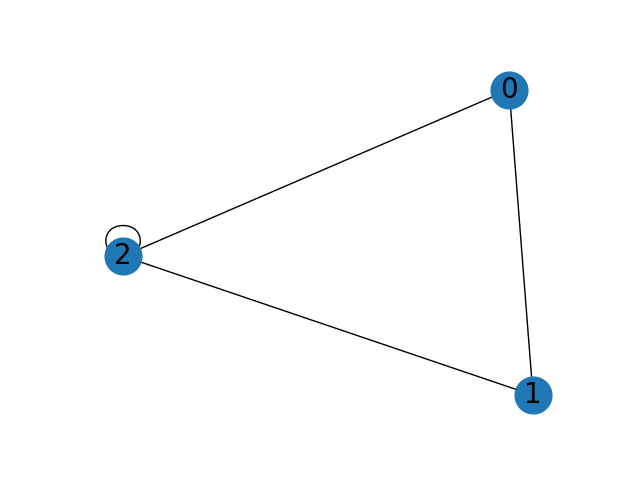

### Список смежности
При представлении графа списками смежности для каждой вершины `i` хранится список `W[i]` смежных с ней вершин.
Например, для графа выше:
``` python
W[0] = [1, 2]
W[1] = [0, 2]
W[2] = [0, 1, 2]
```
Таким образом, весь граф можно представить одним списком, состоящим из вложенных списков смежности вершин.

``` python
W = [[1, 2], [0, 2], [0, 1, 2]]
```
В таком способе удобно перебирать ребра, выходящие из вершины `i` (это просто список `W[i]`), но сложно проверять наличие ребра между вершинами `i` и `j` – для этого необходимо проверить, содержится ли число `j` в списке `W[i]`. 

Но в языке *Python* можно эту часть сделать более эффективной, если заменить списки на множества – тогда проверка существования ребра между двумя вершинами также будет выполняться за `О(1)`. 

**Задание 2** — В ячейке ниже реализуйте код, который строит список смежности на основе множеств из матрицы смежности, графа из задания 1. Проверьте в коде существование ребер между вершинами графа, изображенного выше. Для каждой пары вершин, между которыми существует ребро, выведите **True** и **False** в противном случае.

### Взвешенные графы
Очень часто рассматриваются графы, в которых каждому ребру приписана некоторая числовая характеристика — вес. Соответствующие графы называются взвешенными.

При представлении графа матрицей смежности вес ребра можно хранить в матрице, то есть `A[i][j]` в данном случае будет равно весу ребра из `i` в `j`. При этом при отсутствии ребра можно хранить специальное значение, например, `None`.

При представлении графа списками смежности можно поступить двумя способами. Можно в списках смежности хранить пару (кортеж) из двух элементов – номер конечной вершины и вес ребра. Но в этом случае неудобно проверять наличие ребра между двумя вершинами.

Другой способ – хранить списки смежности как ранее, а веса ребер хранить в отдельном ассоциативном массиве (`dict` в **Python**), в котором ключом будет пара из двух номеров вершин (номер начальной и конечной вершины), а значением будет вес ребра между этими вершинами.

### Гамильтонов цикл
**Гамильтоновым циклом** в графе называют цикл, проходящий через все вершины. 

**Гамильтонов путь** — незамкнутый путь, проходящий через все вершины.

Ниже приведен переборный алгоритм поиска гамильтонова цикла в графе.

Если перенумеровать вершины в графе, то номера вершин в порядке следования их в гамильтоновом цикле образуют некоторую перестановку чисел от 1 до `n`. Можно перебрать все  возможные перестановки и для каждой из них проверить, что данная перестановка соответствует циклу на графе, то есть каждые два соседних элемента в перестановке, а также первый и последний элемент перестановки соединены ребром.

Алгоритм поиска перестановок во многом напоминает алгоритм обхода в глубину, но главное его отличие заключается в том, что если из какой-то вершины не удается продолжить путь дальше (то есть были рассмотрены все ребра и все возможные продолжения привели в тупик), то алгоритм возвращается в предыдущую вершину, при этом покинутая вершина «перекрашивается», то есть с нее снимается отметка о том, что эта вершина была посещена ранее. При этом алгоритм может вернуться в эту вершину еще раз, уже по другому пути (и даже обязан это сделать, если в графе существует гамильтонов путь, так как гамильтонов путь проходит через все вершины).
Пусть `n` — число вершин в графе, вершины пронумерованы числами от `0` до `n-1`. Граф задан матрицей смежности `A`. В глобальной переменной `Path` будет храниться список вершин, входящих в путь.  Функция `hamilton()` принимает в качестве параметра номер вершины, добавляемой к пути и возвращает значение `True`, если удалось построить гамильтонов путь и `False`, если не удалось. Причем если путь построить удалось, то построенный путь будет храниться в списке `Path`:
``` python

Visited = [False] * n
 Path = []
 def hamilton(curr): 
    Path.append(curr)
    if len(Path) == n:
        if A[Path[0]][Path[-1]] == 1:
            return True 
        else: 
            Path.pop() 
            return False 
    Visited[curr] = True
    for next in range(n): 
        if A[curr][next] == 1 and not Visited[next]: 
            if hamilton(next): 
                return True 
    Visited[curr] = False 
    Path.pop()
    return False
```
Функция `hamilton()` прежде всего добавляет вершину `curr` в конец списка `Path`. При этом если длина списка стала равна `n`, то есть все вершины включены в путь `Path`, проверяется, что первая и последняя вершина в пути соединены ребром (это не требуется при помощи гамильтонова пути), если это так — то алгоритм возвращает `True` (цикл найден), в противном случае из списка `Path` удаляется последний элемент и алгоритм возвращает `False` (цикл не найден).

Если же длина списка меньше `n`, то вершина `curr` отмечается, как посещенная и осуществляется перебор дальнейших продолжений. Последовательно перебираются все оставшиеся вершины `next` и если вершина `next` соединена ребром с `curr` и вершина `next` не была посещена, то алгоритм рекурсивно запускается из вершины `next`, пытаясь сделать продолжение пути в вершину `next`. При этом если рекурсивный вызов из вершины `next` вернет `True`, то есть удалось построить цикл, то алгоритм сразу же возвращает `True`, при этом из списка `Path` ничего не удаляется, поэтому `Path` будет хранить полный гамильтонов цикл. Если же ни одно из продолжений не получилось, то осуществляется «откат» вершины `curr` — она помечается, как непосещенная, удаляется из конца списка `Path` и управление передается назад, на последнюю вершину в списке `Path`.

Видно, что сложность алгоритма может быть не менее, чем `n!`, поэтому для больших графов такой алгоритм непригоден.

**Задание 3** — Для графа из задания 3 выведите на экран гамильтонов цикл.

### Задача коммивояжера
Близкой задачей к задаче нахождения гамильтонова цикла является **задача коммивояжера**. Коммивояжеру необходимо посетить `n` городов и вернуться домой. Коммивояжер не хочет посещать города более одного раза и при этом хочет проделать наиболее короткий путь. То есть в неориентированном взвешенном графе необходимо найти путь наименьшей стоимости.
Задача коммивояжера решается аналогично задаче о гамильтоновом пути, но при этом нужно перебрать все возможные пути. При замыкании пути нужно вычислить его вес (лучше это делать не в конце замыкания, а одновременно с добавлением следующей вершины увеличивать вес построенного фрагмента пути на вес рассмотренного ребра) и сравнить вес найденного пути с весом наилучшего известного пути.

### Алгоритм Дейкстры
**Алгоритм Дейкстры** назван в честь голландского ученого Эдсгера Дейкстры (Edsger Dijkstra). Алгоритм был предложен в 1959 году для нахождения кратчайших путей от одной вершины до всех остальных в ориентированном взвешенном графе, при условии, что все ребра в графе имеют неотрицательные веса.
Рассмотрим две модели хранения взвешенного графа в памяти. В первой модели (матрица смежности) будем считать, что вес ребра из вершины `i` в вершину `j` равен `w[i][j]`, то есть в матрице `w` хранятся веса ребра для любых двух вершин. Если из вершины `i` в вершину `j` нет ребра, то `w[i][j]==INF` для некоторого специального значения константы `INF`. Значение `INF` следует выбирать исходя из задачи.
Алгоритм Дейкстры относится к так называемым «жадным» алгоритмам. Пусть расстояние от начальной вершины `start` до вершины `i` хранится в массиве `dist[i]`. Начальные значения `dist[start]=0`, `dist[i]=INF` для всех остальных вершин `i`. То есть в самом начале алгоритму известен путь из вершины `start` до вершины `start` длины `0`, а до остальных вершин кратчайшие пути неизвестны. Между тем алгоритм будет постепенно улучшать значения в массиве `dist`, в результате получит кратчайшие расстояния до всех вершин.
Основная идея для улучшения называется «релаксацией ребра». Пусть из вершины `i` в вершину `j` есть ребро веса `w[i][j]`, при этом выполнено неравенство `dist[i] + w[i][j] < dist[j]`. То есть можно построить маршрут из начальной вершины до вершины `i` и добавить к нему ребро из `i` в `j`, и суммарная стоимость такого маршрута будет меньше, чем известная ранее стоимость маршрута из начальной вершины в вершину `j`. Тогда можно улучшить значение `dist[j]`, присвоив `dist[j] = dist[i] + w[i][j]`.
В алгоритме Дейкстры вершины красятся в два цвета, будем говорить, что вершина «неокрашенная» или «окрашенная». Изначально все вершины неокрашенные. Если алгоритм Дейкстры покрасил вершину `i`, то это означает, что найденное значение `dist[i]` является наилучшим возможным и в последствии не будет улучшаться, то есть значение `dist[i]` является кратчайшим расстоянием от начальной вершины до вершины `i`. Если же вершина не покрашена, то величина `dist[i]` для такой вершины `i` равна кратчайшему пути из вершины `start` до вершины `i`, который проходит только по покрашенным вершинам (за исключением самой вершины `i`).
На каждом шаге алгоритма Дейкстры красится одна новая вершина. В качестве такой вершины выбирается неокрашенная вершина `i` с наименьшим значением `D[i]`. Затем рассматриваются все ребра, исходящие из вершины `i`, и производится релаксация этих ребер, то есть улучшаются расстояния до вершин, смежных с `i`.
Алгоритм заканчивается, когда на очередном шаге не останется неокрашенных вершин или если расстояние до всех неокрашенных вершин будет равно `INF` (то есть эти вершины являются недостижимыми).
Запишем алгоритм Дейкстры. Пусть  — число вершин в графе, вершины пронумерованы от 0 до `n-1`. Номер начальной вершины — `start` и веса ребер хранятся в матрице `w`:
``` python
INF = 10 ** 10
dist = [INF] * n
 dist[start] = 0
used = [False] * n
min_dist = 0
min_vertex = start
 while min_dist < INF:
    i = min_vertex 
    used[i] = True 
    for j in range(n): 
        if dist[i] + w[i][j] < dist[j]: 
            dist[j] = dist[i] + w[i][j] 
    min_dist = INF
    for j in range(n):
        if not used[j] and dist[j] < min_dist:
            min_dist = dist[j]
            min_vertex = j
```
Массив `used` будет хранить информацию о том, была ли покрашена вершина. Сначала инициализируются массивы `dist` и `used`. Затем запускается внешний цикл алгоритма, который выбирает неокрашенную вершину с минимальным расстоянием, номер этой вершины хранится в переменной `min_vertex`, а расстояние до этой вершины — в переменной `min_dist`. Если же `min_dist` оказывается равно `INF`, то значит все неокрашенные вершины являются недостижимыми и алгоритм заканчивает свою работу. Иначе найденная вершина окрашивается и после этого релаксируются все ребра, исходящие из этой вершины.

Для восстановления ответа, то есть для нахождения пути из начальной вершины до всех остальных, необходимо построить дерево кратчайших путей. Это дерево будет состоять из тех ребер, которые были успешно срелаксированы в результате исполнения алгоритма. То есть если происходит релаксация ребра из `i` в `j`, то теперь кратчайший маршрут из вершины `start` до вершины `j` должен проходить через вершину `i` и затем содержать ребро `i-j`. Тем самым вершина `i` становится предшественником вершины `j` на кратчайшем пути из начальной вершины до вершины `j`.
Рассмотрим реализацию алгоритм Дейкстры с восстановлением ответа на графе, хранимым в виде списка смежности на языке **Python**. Набор вершин, смежных с вершиной `i` будет храниться в множестве `w[i]`. Также необходимо хранить веса ребер, будем считать, что для хранения весов ребер используется словарь `weight`, где ключом является кортеж из двух вершин. То есть вес ребра из `i` в `j` хранится в элементе `weight[i, j]` словаря весов:
``` python
dist = [INF] * n
 dist[start] = 0
 prev = [None] * n
used = [False] * n
min_dist = 0
min_vertex = start
 while min_dist < INF:
    i = min_vertex
    used[i] = True
    for j in w[i]:
        if dist[i] + weight[i, j] < dist[j]:
            dist[j] = dist[i] + weight[i, j] 
            prev[j] = i
    min_dist = INF
    for i in range(n): 
    if not used[i] and dist[i] < min_dist: 
        min_dist = dist[i] 
        min_vertex = i
```
Для нахождения кратчайшего пути из вершины `start` до вершины `j` будем переходить от каждой вершины к ее предшественнику:
``` python
path = []
while j is not None:
    path.append(j) 
    j = prev[j] 
path = path[::-1]
```
Алгоритм Дейкстры применим только в том случае, когда веса всех ребер неотрицательные. Это гарантирует то, что после окраски расстояние до вершины не может быть улучшено. Если в графе могут быть ребра отрицательного веса, то следует использовать другие алгоритмы.

**Задание 4** — Для ненаправленного взвешенного графа, заданного парами вершин и их весов найдите кратчайший путь из вершины 0 в вершину 3 с помощью алгоритма Дейкстры:
1. (0, 1, вес = 10)
2. (0, 2, вес = 40)
3. (1, 2, вес = 15)
4. (0, 3, вес = 20)
5. (3, 1, вес = 5)

# Библиотека NetworkX для визуального представления графов
При решении задач контеста удобным инструментом для визуализации графов из примеров является библитотека NetworkX.

Установка библиотеки:
``` python
pip install networkx
```

Подключение библиотеки:

``` python
import networkx as nx
```

NetworkX предназначена для изучения структуры, динамики и функционирования сложных сетей. Она позволяет создавать и хранить графы в стандартных и нестандартных форматах, генерировать много типов случайных и классических графов, анализировать их структуру, строить сетевые модели и создавать новые алгоритмы.

Документация на библиотеку находится по [адресу](https://networkx.org/documentation/stable/).

## Классы графов

NetworkX содержит четыре класса графов:

-   Graph — граф без кратных рёбер (петли допустимы)
-   DiGraph — ориентированный граф без кратных рёбер (петли допустимы)
-   MultiGraph — граф с кратными рёбрами (в том числе с кратными
    петлями)
-   MultiDiGraph — ориентированный граф с кратными рёбрами (в том
    числе с кратными петлями)

Внутреннее представление графов реализовано в виде списков смежности (словарь словарей словарей). Однако во избежании появления несогласованности, все операции с графами должны производится с использованием API функций библиотеки.

## Вершины и рёбра

Вершиной может быть любой неизменяемый тип с вычислимой функцией *hash()*. 

Например, подойдут соедующие типы **Python**:

-   str
-   int
-   float
-   кортеж из строк и чисел
-   frozenset (неизменяемое множество)

Рёбра представляют собой связь двух вершин и чаще вершины имеют привязанные к ним данные — свойства рёбер. Для указания веса ребра, используйте свойство **weight**.

## Создание графа

Графы могут быть созданы тремя основными способами:

-   явное добавление узлов и рёбер

``` python
G = nx.Graph()                                    # создаём экземпляр графа
G.add_edge(1, 2)                                  # ребро добавляется сразу со своими вершинами
G.add_edge(2, 3)                                  # стандартный вес ребра weight=1
G.add_edge(3, 4, weight = 0.9)                    # можно задать weight сразу при создании ребра
G.add_node(5)                                     # изолированный узел можно добавить отдельно
G.add_node(6, x = 1.5, y = -5.0, data = ['any'])  # и сразу задать ему любые свойства
```

-   генераторами графов --- алгоритмами порождения стандартных сетевых
    топологий

``` python
G = nx.complete_graph(10)    # полносвязный граф с 10 вершинами
G = nx.path_graph(10)        # 10 узлов, расположенных "в линеечку"
G = nx.cycle_graph(10)       # 10 узлов, связанных кольцом
G = nx.star_graph(5)         # звезда с 1 узлом в середине и 5 узлами-лучами
G = nx.balanced_tree(2, 3)   # сбалансированное двоичное дерево высоты 3
G = nx.empty_graph(10)       # граф с 10 вершинами без рёбер
```

-   импорт данных графа из некоторого формата (обычно из файла)

``` python
d = {0: {1: {'weight': 10}, 2: {'weight': 20}},
     1: {0: {'weight': 10}, 3: {'weight': 30}},
     2: {0: {'weight': 20}},
     3: {1: {'weight': 30}}}
G = nx.Graph(d)
dd = nx.to_dict_of_dicts(G) # d == dd
```

## Визуализация графа

Визуализация графов --- нетривиальная задача! Существует много полноценных библиотек, предназначенных именно для этого: Cytoscape, Gephi, Graphviz или PGF/TikZ для LaTeX. Для их использования можно экспортировать граф из NetworkX в формат GraphML.

Однако, есть и самый простой способ визуализации, встроенный в саму библиотеку NetworkX, при подключении библиотеки
*matplotlib.pyplot*.

``` python
nx.draw(G)           # отобразить граф при помощи Matplotlib
nx.draw_circular(G)  # Использовать расположение circular layout
nx.draw_random(G)    # Использовать расположение random layout
nx.draw_spectral(G)  # Использовать расположение spectral layout
nx.draw_spring(G)    # Использовать расположение spring layout
nx.draw_shell(G)     # Использовать расположение shell layout
nx.draw_graphviz(G)  # Использовать graphviz для расположения вершин
```
Перед выполнением примера ниже не забудьте установить библиотеку *matplotlib*:
``` python
pip install -U matplotlib
```

### Пример визуализации графа №1
Выполните приведенный ниже пример в ячейке *code*

``` python
import matplotlib.pyplot as plt
import networkx as nx

G=nx.path_graph(8)
nx.draw(G)
plt.savefig("simple_path.png") # сохранить как png файл
plt.show() # вывести на экран
```

### Пример визуализации графа №2

Пример добавления этикеток на вершины и подкрашивания рёбер:

``` python
"""
Отрисовка графа через matplotlib, с разными цветами.

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""

import matplotlib.pyplot as plt
import networkx as nx

G=nx.cubical_graph()
pos=nx.spring_layout(G) # позиции всех вершин

# вершины
nx.draw_networkx_nodes(G, pos,
                   nodelist=[0,1,2,3], # список вершин
                   node_color='r',     # красный цвет
                   node_size=500,      # размер
               alpha=0.8)              # прозрачность
nx.draw_networkx_nodes(G, pos,
                   nodelist=[4,5,6,7],
                   node_color='b',
                   node_size=500,
               alpha=0.8)

# рёбра
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5) # все рёбра
nx.draw_networkx_edges(G, pos,
                   edgelist=[(0,1),(1,2),(2,3),(3,0)],
                   width=8, alpha=0.5, edge_color='r')   # красные рёбра
nx.draw_networkx_edges(G, pos,
                   edgelist=[(4,5),(5,6),(6,7),(7,4)],
                   width=8, alpha=0.5, edge_color='b')   # синие рёбра

# добавим математические названия вершин
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.savefig("labels_and_colors.png") # сохранить как png картинку
plt.show() # вывести на экран
```
Выполните пример в ячейке ниже.

#### Пример визуализации графа №3

Ещё один пример добавления этикеток на вершины и подкрашивания рёбер:

``` python
"""
Пример использования Graph как взешенного.
"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""

import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

#   добавляем рёбра и вершины

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]  # "тяжёлые"
esmall = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5] # "лёгкие"

pos = nx.spring_layout(G) # позиции всех вершин

# вершины
nx.draw_networkx_nodes(G, pos, node_size=700)

# рёбра
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                width=6)                                   # "тяжёлые"
nx.draw_networkx_edges(G, pos, edgelist=esmall,
       width=6, alpha=0.5, edge_color='b', style='dashed') # "лёгкие"

# метки
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # сохранить как png картинку
plt.show() # вывести на экран
```